# Case Study: Mcdonalds Fast Food

*  The purpose of this case study is to offer another illustration of market segmentation analysis using a different empirical data set.
* For this case study, imagine that you are McDonald’s, and you would want to know if consumer segments exist that have a distinctly different image of McDonald’s. Understanding such systematic differences of brand perceptions by market segments informs which market segments to focus on, and what messages to communicate to them. We can choose to focus on market segments with a positive perception, and strengthen the positive perception. Or we can choose to focus on a market segment that currently perceives McDonald’s in a negative way. In this case, we want to understand the key drivers of the negative perception, and modify them

In [1]:
# Importing the all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from bioinfokit.visuz import cluster
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree

# # By importing the warnings we can ignore the future warning messages
import warnings
warnings.simplefilter('ignore')

In [2]:
# Load the mcdonalds dataset
df=pd.read_csv("C:/Users/gurav/OneDrive/Desktop/mcdonalds.csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


### About dataset:

* The data set contains responses from 1453 adult Australian consumers relating to their perceptions of McDonald’s with respect to the following attributes: YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING.
* In this above attributes are the segmentation variables for the data-driven market segmentation in Mcdonalds case study.
* For each of those attributes, respondents provided either a YES response (indicating that they feel McDonald’s possesses this attribute), or a NO response (indicating that McDonald’s does not possess this attribute).

In [3]:
# This line shows basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


* First we explore the key characteristics of the data set by loading the data set and inspecting basic features such as the variable names, the sample size, and the first three rows of the data:

In [4]:
# it will shows all the columns in the dataset
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
# Shape of the dataset
df.shape

(1453, 15)

In [6]:
# Top 3 rows(records)
df.head(3)

,yummy,convenient,spicy,fattening,greasy,...,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,...,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,...,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,...,No,+1,62,Every three months,Female


* This quick glance at the data shows that the segmentation variables (perception
of McDonald’s) are verbal, not numeric. This means that they are coded using
the words YES and NO. This is not a suitable format for segment extraction. We
need numbers, not words. To get numbers, we store the segmentation variables in a
separate matrix, and convert them from verbal YES/NO to numeric binary.

In [7]:
# Features with its value counts
for count in df.columns:
    print('\n',f'<====== {count} =====>')
    print(df[count].value_counts())


 <====== yummy =====>
yummy
Yes    803
No     650
Name: count, dtype: int64

 <====== convenient =====>
convenient
Yes    1319
No      134
Name: count, dtype: int64

 <====== spicy =====>
spicy
No     1317
Yes     136
Name: count, dtype: int64

 <====== fattening =====>
fattening
Yes    1260
No      193
Name: count, dtype: int64

 <====== greasy =====>
greasy
Yes    765
No     688
Name: count, dtype: int64

 <====== fast =====>
fast
Yes    1308
No      145
Name: count, dtype: int64

 <====== cheap =====>
cheap
Yes    870
No     583
Name: count, dtype: int64

 <====== tasty =====>
tasty
Yes    936
No     517
Name: count, dtype: int64

 <====== expensive =====>
expensive
No     933
Yes    520
Name: count, dtype: int64

 <====== healthy =====>
healthy
No     1164
Yes     289
Name: count, dtype: int64

 <====== disgusting =====>
disgusting
No     1100
Yes     353
Name: count, dtype: int64

 <====== Like =====>
Like
+3              229
+2              187
0               169
+4            

In [8]:
# Check the null values
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

There is no such null are present

In [9]:
# Check the duplicated records
df.duplicated().sum()

22

In [10]:
# There is 22 duplicated records so removeing the records
df.drop_duplicates(inplace=True)

In [11]:
# after removeing the duplicated records once again check 
df.duplicated().sum()

0

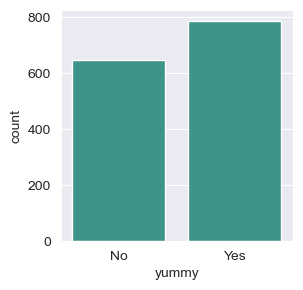

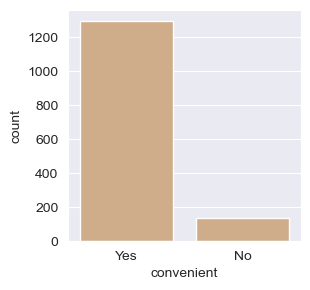

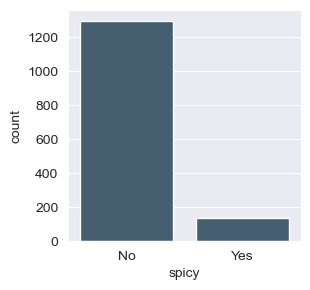

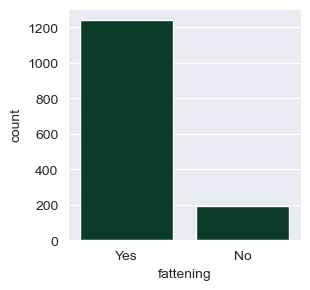

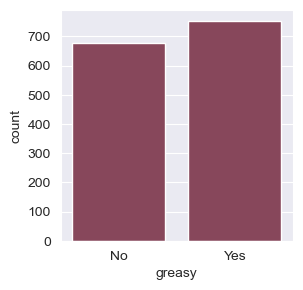

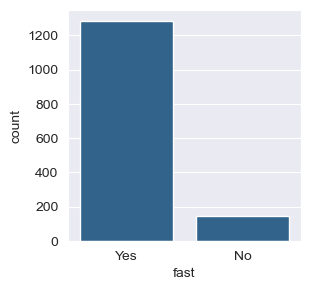

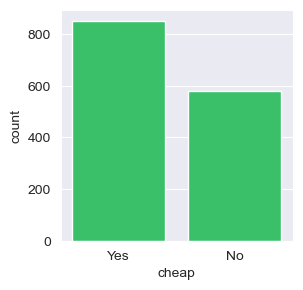

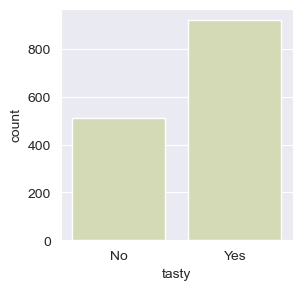

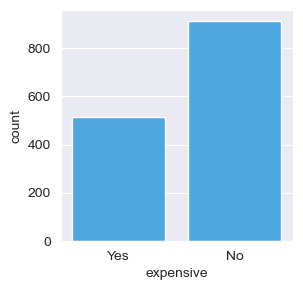

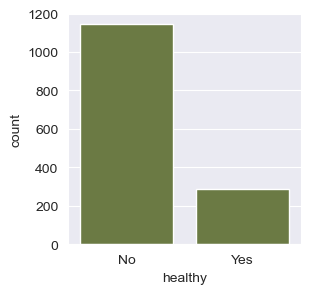

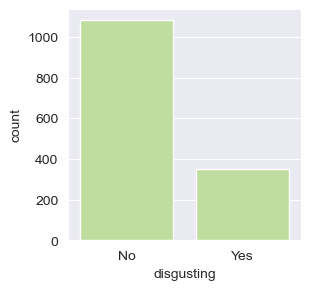

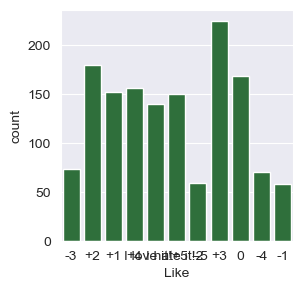

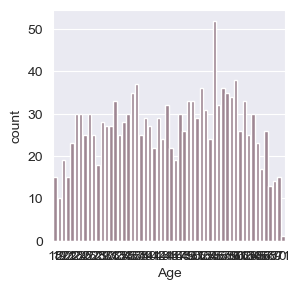

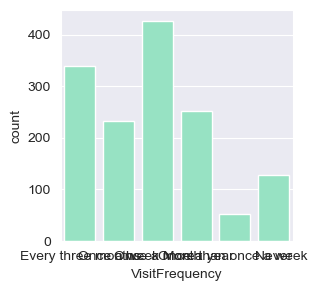

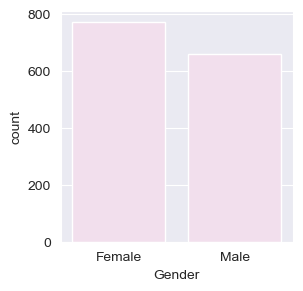

In [12]:
# Check the features with its value counts visually
for count in df.columns:
    plt.figure(figsize=(3,3))
    sns.set_style('darkgrid')
    sns.countplot(x=df[count],color=np.random.rand(3,))
    plt.show()

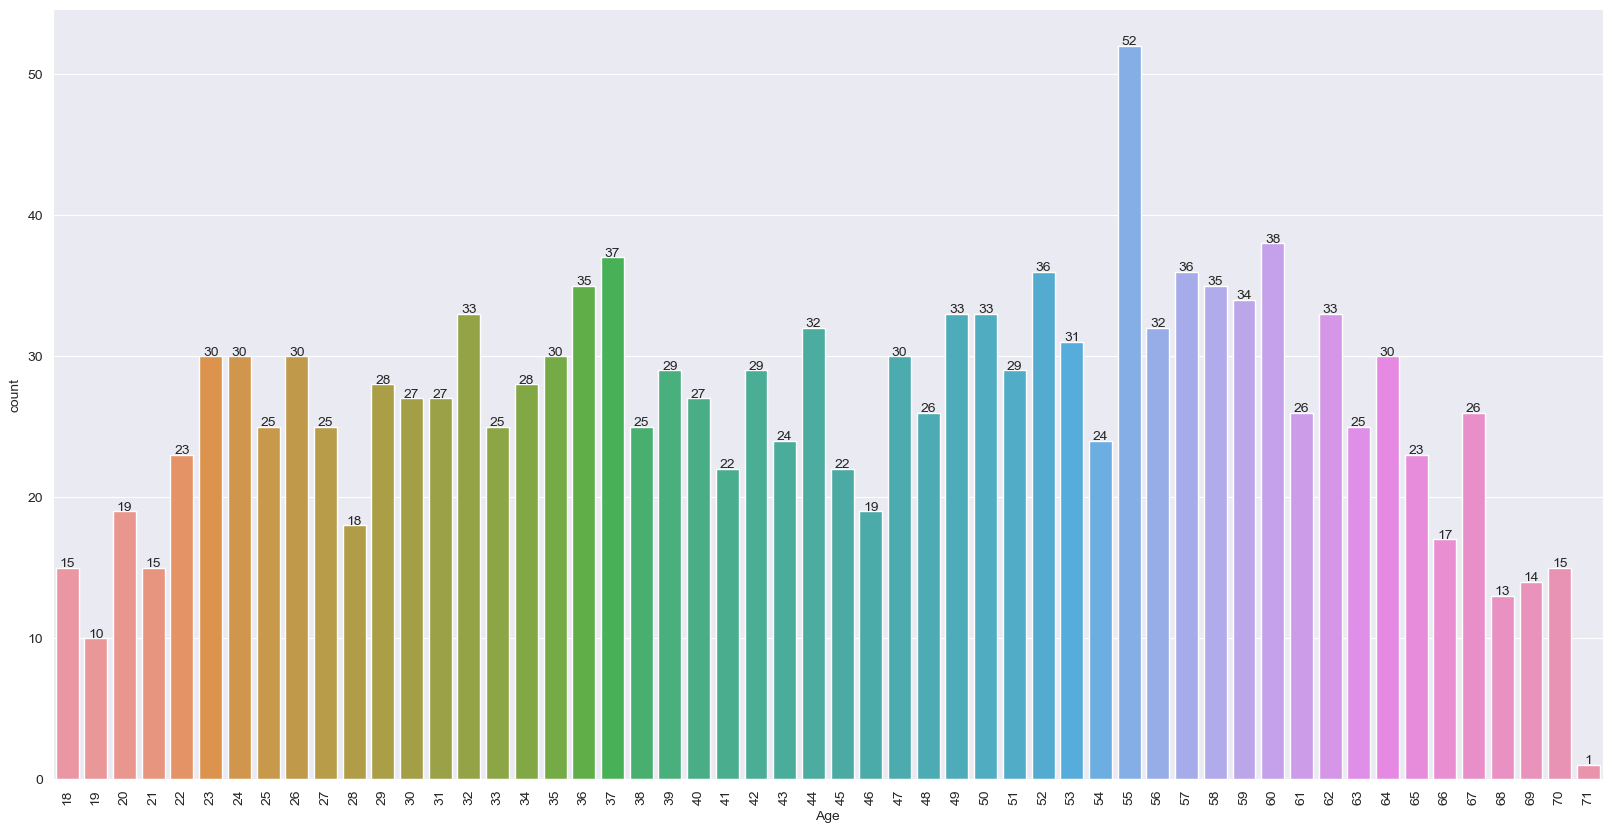

In [13]:
# ckech the age wise value counts
fig, ax1 = plt.subplots(figsize=(20, 10))
graph = sns.countplot(ax=ax1, x='Age', data=df)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center")


In [15]:
# check the gender count
Gender_counts=df['Gender'].value_counts()
Gender_counts

Gender
Female    772
Male      659
Name: count, dtype: int64

Gender
Female    772
Male      659
Name: count, dtype: int64


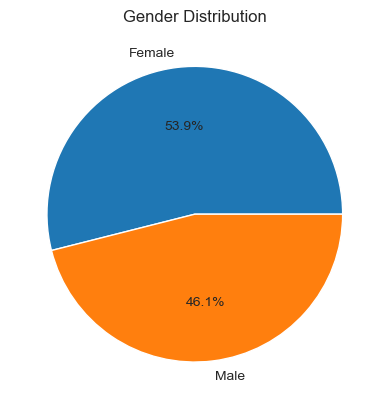

In [16]:
# Displaying the gender wise percentage by using pie chart
print(df['Gender'].value_counts())
plt.pie(Gender_counts, labels = Gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

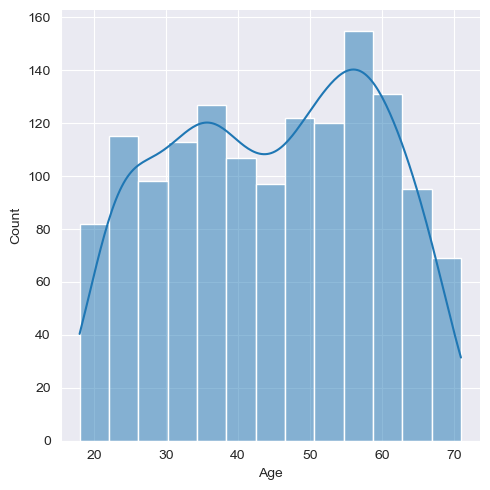

In [17]:
# check the distribution of the age column
sns.displot(x=df['Age'],kde=True)
plt.show()

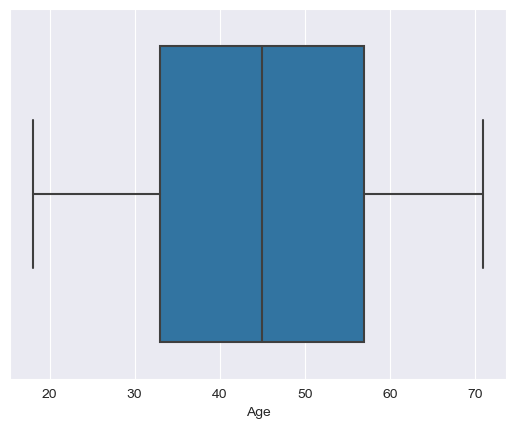

In [18]:
# check is there outliers are present in a dataset 
sns.boxplot(x=df['Age'])
plt.show()

* First we extract the first eleven columns from the data set because these columns
contain the segmentation variables, and convert the data to a matrix. Then we
identify all YES entries in the matrix. This results in a logical matrix with entries
TRUE and FALSE. Adding 0 to the logical matrix converts TRUE to 1, and FALSE
to 0.

In [19]:
# Convert this 11 features into numeric
df_x=pd.get_dummies(df.drop(columns=['Like','Age','VisitFrequency','Gender'],axis=1),drop_first=True,dtype=int)
df_x

,yummy_Yes,convenient_Yes,spicy_Yes,fattening_Yes,greasy_Yes,fast_Yes,cheap_Yes,tasty_Yes,expensive_Yes,healthy_Yes,disgusting_Yes
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


After transforming the segmentation variables from categorical to numerical, We check that we transformed the data correctly by inspecting the average value of each transformed segementation variable.

In [20]:
# check if all the categorical values converted successfully or not by cheking its mean
np.round(df_x.mean(),2)

yummy_Yes         0.55
convenient_Yes    0.91
spicy_Yes         0.10
fattening_Yes     0.87
greasy_Yes        0.53
fast_Yes          0.90
cheap_Yes         0.60
tasty_Yes         0.64
expensive_Yes     0.36
healthy_Yes       0.20
disgusting_Yes    0.24
dtype: float64

The average values of the transformed binary numeric segmentation variables
indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
McDonald’s food is SPICY.

In [21]:
# PCA analysis
pca_data=preprocessing.scale(df_x)
pca = PCA(n_components=11)
df_pca = pca.fit_transform(df_x)
print("PCA value: ",pca.explained_variance_ratio_)
print('standard deviation: ',np.sqrt(pca.explained_variance_ratio_))

PCA value:  [0.29899056 0.19156392 0.13267983 0.08290307 0.05969759 0.05069322
 0.04429957 0.03985029 0.03715547 0.03260161 0.02956487]
standard deviation:  [0.54680029 0.43768016 0.36425242 0.28792893 0.2443309  0.22515156
 0.21047463 0.19962538 0.19275754 0.18055916 0.17194438]


* Another way of exploring data initially is to compute a principal components analysis, and create a perceptual map. A perceptual map offers initial insights into how attributes are rated by respondents

In [22]:
# converting the all PCA segments into dataframe
df_pc=pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
df_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.419114,-0.231691,0.660553,-0.394399,0.200925,-0.391549,-0.213729,0.167607,0.179510,0.531101,-0.554209
1,-0.220189,0.393341,-0.729516,-0.102505,0.043964,-0.085099,-0.095786,-0.034779,0.110699,0.507822,-0.487602
2,0.371455,0.728362,-0.124168,0.683734,0.849209,-0.677356,0.581753,0.364017,-0.327911,0.050151,0.243132
3,-0.179665,-0.345683,-0.851313,0.204693,-0.680349,-0.036688,-0.056524,-0.232855,-0.024518,-0.247991,-0.056664
4,0.173971,-0.808123,0.016911,0.545781,0.860236,-0.083213,-0.456052,0.164836,-0.073457,0.027998,0.081264
...,...,...,...,...,...,...,...,...,...,...,...
1426,1.547013,0.263928,-0.014192,0.201105,-0.146572,0.309209,-0.076867,0.344021,-0.136215,-0.419146,-0.464879
1427,-0.963333,0.018977,0.298754,0.445180,-0.134964,0.391248,-0.330860,0.870713,-0.305065,-0.240094,-0.197849
1428,-0.182781,1.057798,0.229392,-0.470739,-0.191532,-0.199227,-0.093868,-0.033670,0.039346,0.057964,-0.012160
1429,-1.188787,-0.033521,0.555086,0.696727,0.047700,0.195972,-0.024075,-0.345070,0.023337,-0.000024,-0.107268


In [23]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy_Yes,-0.473652,0.370610,-0.301355,0.053818,-0.307839,0.170267,-0.278457,0.012604,0.574230,-0.107604,0.042649
convenient_Yes,-0.155302,0.016830,-0.062892,-0.144547,0.276766,-0.343663,-0.060092,-0.108304,-0.015511,-0.652477,-0.561015
spicy_Yes,-0.007448,0.019080,-0.039472,0.199271,0.073973,-0.353279,0.707035,0.381458,0.395773,-0.079203,0.140418
fattening_Yes,0.116058,-0.034366,-0.322261,-0.349149,-0.069891,-0.403426,-0.392024,0.590763,-0.160342,-0.011932,0.251830
greasy_Yes,0.303698,-0.057601,-0.802992,0.245048,0.362733,0.215346,0.038995,-0.141622,-0.002631,0.008337,0.001655
fast_Yes,-0.109396,-0.086865,-0.065928,-0.097602,0.112772,-0.598702,-0.085239,-0.625020,0.168059,0.228139,0.342411
cheap_Yes,-0.341107,-0.606855,-0.155916,0.123186,-0.127236,-0.101218,-0.040913,0.140513,0.073985,0.441522,-0.477097
tasty_Yes,-0.469349,0.312024,-0.285723,-0.006973,-0.211855,-0.079163,0.357405,-0.073368,-0.640410,0.075988,0.022303
expensive_Yes,0.333174,0.598525,0.028200,0.068841,-0.000381,-0.262920,-0.067548,0.031604,0.064168,0.466890,-0.477950


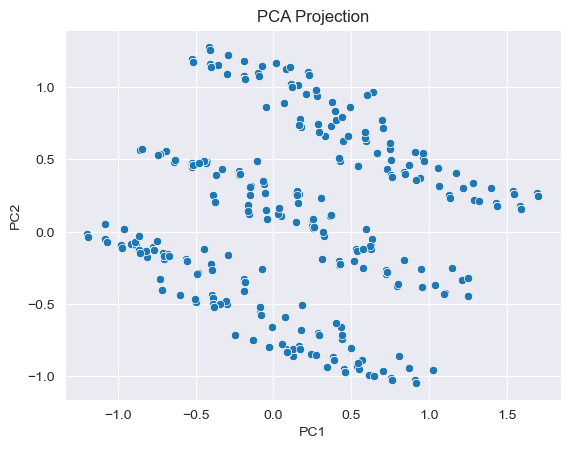

In [24]:
# Check the PCA projection of the dataset
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

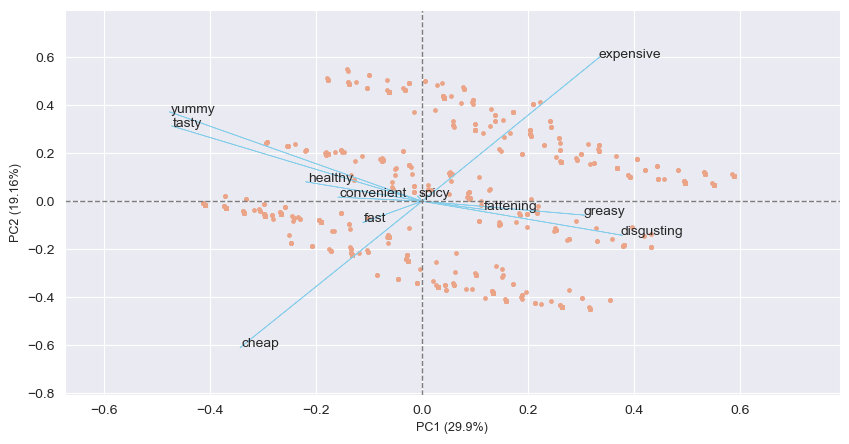

In [25]:
# get PC scores
pca_scores = PCA().fit_transform(df_x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

* Results from principal components analysis indicate that the first two components
capture about 50% of the information contained in the segmentation variables.

K-Means

In [26]:
# calculate the wcss values for findout the optimal number of clusters
wcss=[]
for k in range(2,9):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df_x)
    wcss.append(kmeans.inertia_)
print(wcss)

[2124.795438245039, 1805.1931711407954, 1635.8328769270893, 1425.4202109030298, 1337.403180673402, 1240.343303410197, 1180.317828862414]


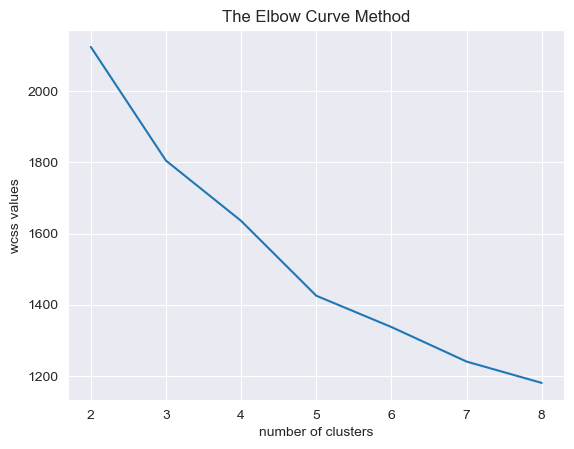

In [27]:
# visualize the Elbow Curve
plt.plot(range(2,9),wcss)
plt.xticks(range(2,9))
plt.title('The Elbow Curve Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss values')
plt.show()

* We calculate solutions for two to eight market segments using standard k-means analysis with ten random restarts (argument nrep). We then relabel segment numbers such that they are consistent across segmentations.

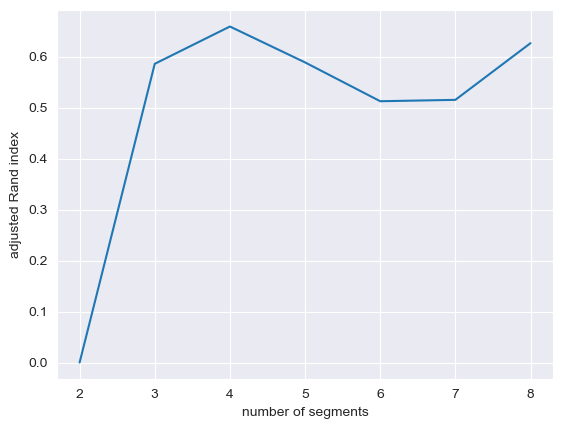

In [28]:
# check the adjusted rand index score
from sklearn.metrics import adjusted_rand_score
# K-means clustering
np.random.seed(1234)
clusters_range = range(1, 9)
df_km28 = [KMeans(n_clusters=k, n_init=10).fit(df_x) for k in clusters_range]
# Plotting number of segments
# Adjusted Rand Index
df_b28 = [adjusted_rand_score(df_km28[i].labels_, df_km28[i-1].labels_) for i in range(1, len(df_km28))]
plt.plot(clusters_range[1:], df_b28)
plt.xlabel('number of segments')
plt.ylabel('adjusted Rand index')
plt.show()

In [29]:
# from the above curve best clusters are 4
kmeans=KMeans(n_clusters=4,init='k-means++')
y_kmeans=kmeans.fit_predict(df_x)

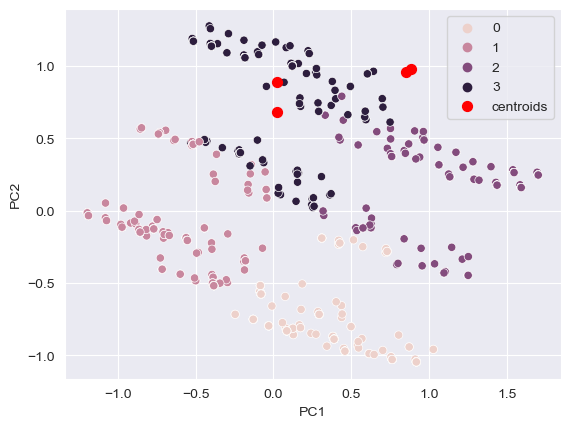

In [30]:
# The first two principal components capture about 50% so we are taken first two PC's
sns.scatterplot(x='PC1',y='PC2',data=df_pc,hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r',s=50,label='centroids')
plt.legend()
plt.show()

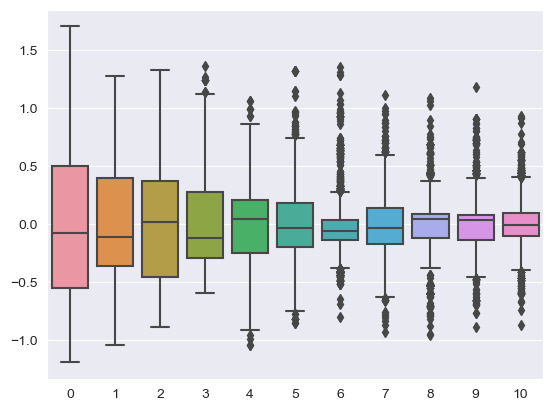

In [31]:
# chech the distribution of stability by using boxplot
sns.boxplot(df_pca)
plt.show()

* The vertical boxplots show the distribution of stability for each number of segments. The median is indicated by the fat black horizontal line in the middle of the box. Higher stability is better

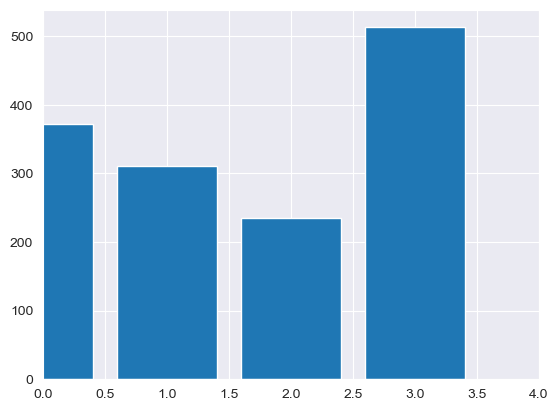

In [32]:
# Histogram for cluster 4
plt.hist(df_km28[3].labels_, bins=np.arange(0, 5) - 0.5, rwidth=0.8)
plt.xlim(0, 4)
plt.show()

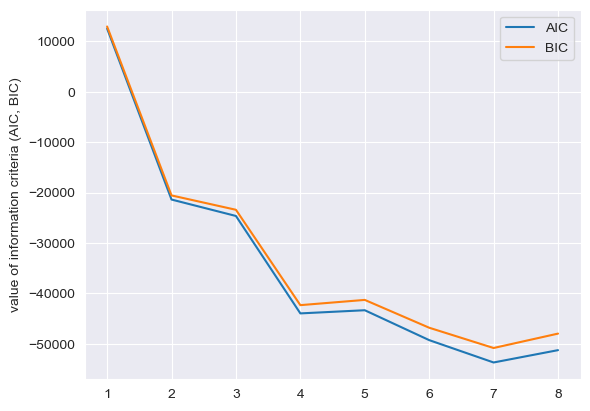

In [33]:
# Gaussian Mixture Model
df_m28 = [GaussianMixture(n_components=k, n_init=10).fit(df_x) for k in clusters_range]
# Plot information criteria
aic = [model.aic(df_x) for model in df_m28]
bic = [model.bic(df_x) for model in df_m28]
plt.plot(clusters_range, aic, label='AIC')
plt.plot(clusters_range, bic, label='BIC')
plt.legend()
plt.ylabel('value of information criteria (AIC, BIC)')
plt.show()

* The information criteria values AIC, BIC on the y-axis 
for the different number of components (segments) on the x-axis. As can be seen, th 
values of all information criteria decrease quite dramatically until four componen s
(market segments) are reached. I

In [34]:
# Mixture model for cluster 4
df_m4 = df_m28[3]  # Assuming cluster 4 is index 3
print(pd.crosstab(df_km28[3].labels_, df_m4.predict(df_x)))

col_0    0    1    2   3
row_0                   
0       74  254   38   6
1      183    0  106  22
2        0   17  140  78
3      409    2   72  30


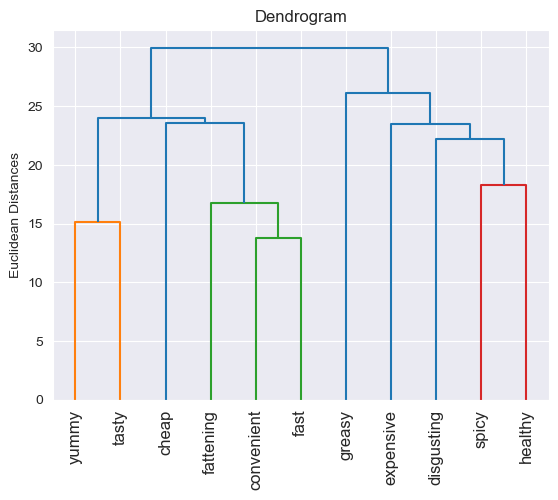

In [35]:
# visualize the Dendrogram
data=sch.linkage(df_x.T,method='average')
dendrogram=sch.dendrogram(data,labels=df.columns[:11])

plt.title('Dendrogram')
plt.xticks(rotation=90)
plt.ylabel('Euclidean Distances')
plt.show()

* The mosaic plots segment number along the x-axis, and loving or hating McDonald’s along the y-axis. The mosaic plot reveals a strong and significant association between those two variables.

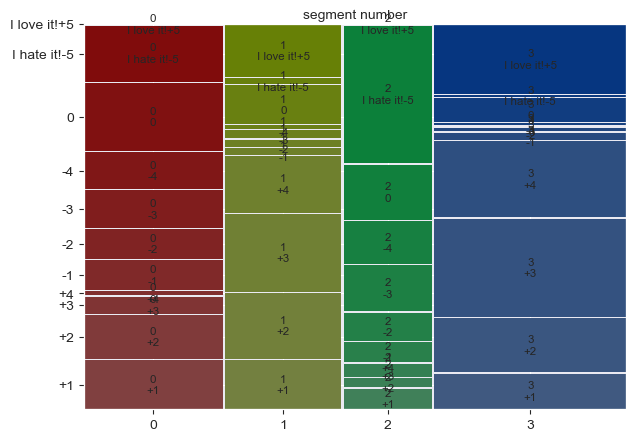

In [36]:
# Mosaic plots
from statsmodels.graphics.mosaicplot import mosaic
crosstab=pd.crosstab(df_km28[3].labels_, df['Like'])
plt.rcParams['figure.figsize']=(7,5)
mosaic(crosstab.stack())
plt.xlabel('segment number')
plt.show()

* The fast food data contains a few other basic descriptor variables, such as gender and age. The below figure shows gender distribution across segments.

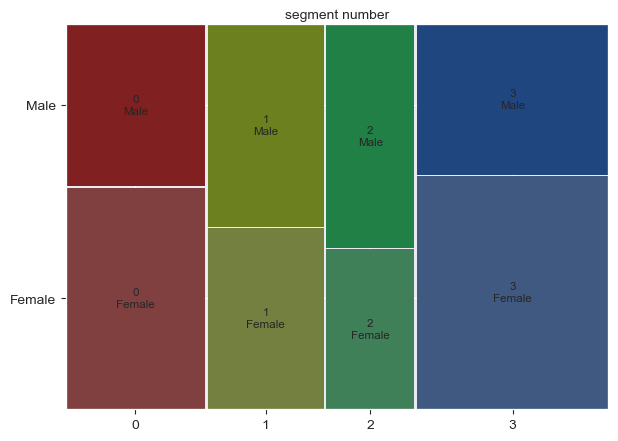

In [37]:
# Mosaic plot
crosstab=pd.crosstab(df_km28[3].labels_, df['Gender'])
mosaic(crosstab.stack())
plt.xlabel('segment number')
plt.show()

In [38]:
df['cluster_num']=kmeans.labels_

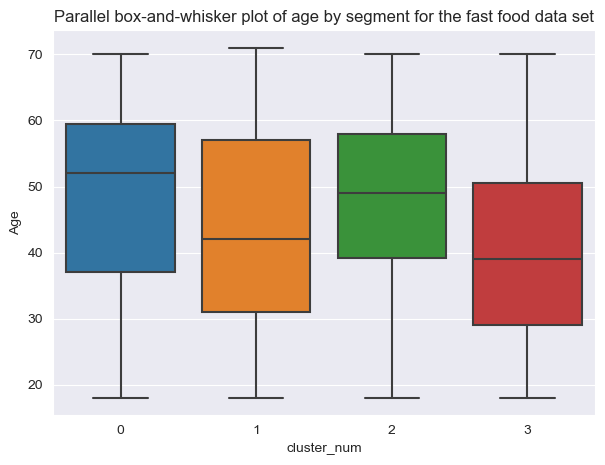

In [39]:
# check the clusters wise age segmentation
sns.boxplot(x=df['cluster_num'],y=df['Age'])
plt.title('Parallel box-and-whisker plot of age by segment for the fast food data set')
plt.show()

In [40]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, n_init=10)
df_m4 = gmm.fit(df_x)
print(df_m4.means_)

[[1.         0.97492163 0.08620682 0.83072098 0.41536045 1.
  0.67398119 1.         0.28840118 0.30564261 0.        ]
 [0.17500001 0.25833333 0.11666667 0.63333334 0.625      0.52500001
  0.17500001 0.20833334 0.81666666 0.15833334 0.64166666]
 [0.40966279 1.         0.12259119 1.         0.68709856 0.71613937
  0.28710606 0.44837901 0.75481144 0.12258472 0.48387334]
 [0.         0.92286263 0.0798796  0.89255867 0.55371338 1.
  0.85951397 0.3223172  0.         0.09641453 0.33883635]]


In [41]:
# enncoding for the like column
le=LabelEncoder()
df['Like']=le.fit_transform(df[['Like']])

* Instead of finding market segments of consumers with similar perceptions of McDonald’s, it may be interesting to find market segments containing members whose love or hate for McDonald’s is driven by similar perceptions. This segmentation approach would enable McDonald’s to modify critical perceptions selectively for certain target segments in view of improving love and reducing hate.
* We extract such market segments using finite mixtures of linear regression 
models, also called latent class regressions. Here, the variables are not all treate 
in the same way. Rather, one dependent variable needs to be specified whi h
captures the information predicted using the independent variables. We choose as
dependent variable y the degree to which consumers love or hate McDonald’s. The
dependent variable contains responses to the statement I LIKE MCDONALDS.  t is
measured on an 11-point scale with endpoints labelled I LOVE IT! and I HAT  IT!.
The independent variables x are the perceptions of McDonald’s. In this a proach
the segmentation variables can be regarded as unobserved, and consistin  of the
regression coefficients. This means market segments consist of consumers for whom
changes in perceptions have similar effects on their liking of M
* First we create a numerical dependent variable by converting the ordinal variable 
LIKE to a numeric one. We need a numeric variable to fit mixtures of linea 
regression models. The categorical variable has 11 levels, from I LOVE IT!(+5) wi h
numeric code 1 to I HATE IT!(-5) with numeric code 11. Computing 6 minus  he
numeric code will result in 6 − 11 = −5 for I HATE IT!-5, 6 − 10 = −4 for
"-4"., etccDonald’s.

In [42]:
# Mixture of regression models
df['Like_n'] = 6 - df['Like'].astype(int)
formula = 'Like_n ~ ' + ' + '.join(df.columns[:11])
df_reg2 = smf.ols(formula, data=df).fit()
print(df_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     23.49
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           8.67e-45
Time:                        22:13:07   Log-Likelihood:                -3680.4
No. Observations:                1431   AIC:                             7385.
Df Residuals:                    1419   BIC:                             7448.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3498      0.46

In [43]:
le=LabelEncoder()
df['VisitFrequency']=le.fit_transform(df[['VisitFrequency']])

In [44]:
# Cluster wise like 
Like=df.groupby('cluster_num')['Like'].mean()
Like=Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.408027
1,1,3.791887
2,2,6.739837
3,3,3.830721


In [45]:
# Label encoding for the gender feature and check the mean along with clusters
le=LabelEncoder()
df['Gender']=le.fit_transform(df[['Gender']])
Gender=df.groupby('cluster_num')['Gender'].mean()
Gender=Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.418060
1,1,0.400353
2,2,0.569106
3,3,0.523511


In [46]:
# # Label encoding for the visitfrequency feature and check the mean along with clusters
le=LabelEncoder()
df['VisitFrequency']=le.fit_transform(df[['VisitFrequency']])
visit_freq=df.groupby('cluster_num')['VisitFrequency'].mean()
visit_freq=visit_freq.to_frame().reset_index()
visit_freq

,cluster_num,VisitFrequency
0,0,2.839465
1,1,2.578483
2,2,2.654472
3,3,2.551724


In [47]:
#  creating a segment for all the related segmentation features
segment=pd.merge(Like,visit_freq,on='cluster_num',how='left').merge(Gender,on='cluster_num',how='left')
segment

,cluster_num,Like,VisitFrequency,Gender
0,0,5.408027,2.839465,0.418060
1,1,3.791887,2.578483,0.400353
2,2,6.739837,2.654472,0.569106
3,3,3.830721,2.551724,0.523511


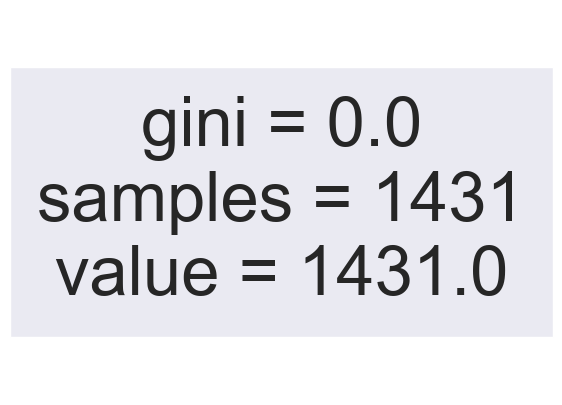

In [48]:
# Decision tree
tree = DecisionTreeClassifier()
tree.fit(df[['Like_n', 'Age', 'VisitFrequency', 'Gender']], df_km28[2].labels_ == 3)
plot_tree(tree)
plt.show()

In [49]:
# Target segment analysis
visit = df.groupby(df_km28[3].labels_)['VisitFrequency'].mean()
like = df.groupby(df_km28[3].labels_)['Like_n'].mean()
female = df.groupby(df_km28[3].labels_)['Gender'].apply(lambda x: (x == 'Female').mean())

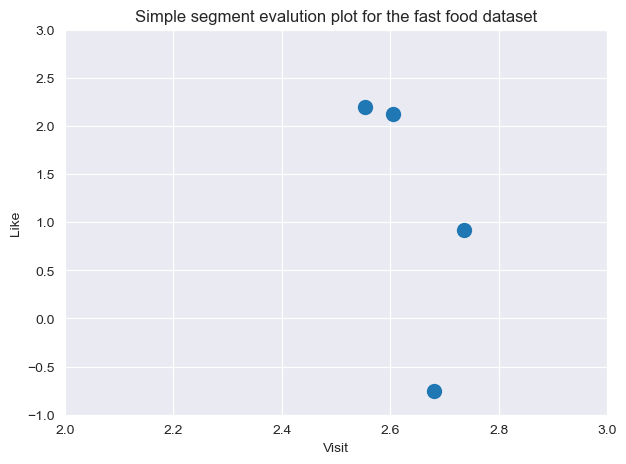

In [50]:
plt.scatter(visit, like, s=100 )
# for i, txt in enumerate(range(1, 5)):
#     plt.annotate(txt, (visit.iloc[i], like.iloc[i]))
plt.xlim(2, 3)
plt.ylim(-1, 3)
plt.title('Simple segment evalution plot for the fast food dataset')
plt.xlabel('Visit')
plt.ylabel('Like')
plt.show()